<h1><center> Lab Customer Analysis Final Round</center></h1>
<center >By Chuk Leng Lim</center>

### 01 - Problem (case study)

[GIThub link to question](https://github.com/Chuk55/lab-customer-analysis-final-round)
9134 rows 24 columns of data -
Goal target total claim amount

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder



import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

### 02 - Getting data

In [2]:
#read csv file
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.shape

(9134, 24)

### 03 -Cleaning/Wrangling/EDA

#### Data exploration

In [4]:
#standardize header names
print(data.columns)
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].upper().replace(' ','_'))
data.columns = cols
print(cols)

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
['CUSTOMER', 'STATE', 'CUSTOMER_LIFETIME_VALUE', 'RESPONSE', 'COVERAGE', 'EDUCATION', 'EFFECTIVE_TO_DATE', 'EMPLOYMENTSTATUS', 'GENDER', 'INCOME', 'LOCATION_CODE', 'MARITAL_STATUS', 'MONTHLY_PREMIUM_AUTO', 'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION', 'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES', 'POLICY_TYPE', 'POLICY', 'RENEW_OFFER_TYPE', 'SALES_CHANNEL', 'TOTAL_CLAIM_AMOUNT', 'VEHICLE_CLASS', 'VEHICLE_SIZE']


In [5]:
# DateTime Format
data['EFFECTIVE_TO_DATE'].dtype
data['EFFECTIVE_TO_DATE'] = pd.to_datetime(data['EFFECTIVE_TO_DATE'], errors='coerce')
data['EFFECTIVE_TO_DATE'].dtype
data.head()

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### cleaning data - check for missing values

In [6]:
pd.isnull(data).any() # check for null

CUSTOMER                         False
STATE                            False
CUSTOMER_LIFETIME_VALUE          False
RESPONSE                         False
COVERAGE                         False
EDUCATION                        False
EFFECTIVE_TO_DATE                False
EMPLOYMENTSTATUS                 False
GENDER                           False
INCOME                           False
LOCATION_CODE                    False
MARITAL_STATUS                   False
MONTHLY_PREMIUM_AUTO             False
MONTHS_SINCE_LAST_CLAIM          False
MONTHS_SINCE_POLICY_INCEPTION    False
NUMBER_OF_OPEN_COMPLAINTS        False
NUMBER_OF_POLICIES               False
POLICY_TYPE                      False
POLICY                           False
RENEW_OFFER_TYPE                 False
SALES_CHANNEL                    False
TOTAL_CLAIM_AMOUNT               False
VEHICLE_CLASS                    False
VEHICLE_SIZE                     False
dtype: bool

In [7]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

In [8]:
pd.DataFrame(X_cat.columns)

,0
0,CUSTOMER
1,STATE
2,RESPONSE
3,COVERAGE
4,EDUCATION
5,EMPLOYMENTSTATUS
6,GENDER
7,LOCATION_CODE
8,MARITAL_STATUS
9,POLICY_TYPE


In [9]:
pd.DataFrame(X_num.columns)

,0
0,CUSTOMER_LIFETIME_VALUE
1,INCOME
2,MONTHLY_PREMIUM_AUTO
3,MONTHS_SINCE_LAST_CLAIM
4,MONTHS_SINCE_POLICY_INCEPTION
5,NUMBER_OF_OPEN_COMPLAINTS
6,NUMBER_OF_POLICIES
7,TOTAL_CLAIM_AMOUNT


In [10]:
data.count() # show number of row

CUSTOMER                         9134
STATE                            9134
CUSTOMER_LIFETIME_VALUE          9134
RESPONSE                         9134
COVERAGE                         9134
EDUCATION                        9134
EFFECTIVE_TO_DATE                9134
EMPLOYMENTSTATUS                 9134
GENDER                           9134
INCOME                           9134
LOCATION_CODE                    9134
MARITAL_STATUS                   9134
MONTHLY_PREMIUM_AUTO             9134
MONTHS_SINCE_LAST_CLAIM          9134
MONTHS_SINCE_POLICY_INCEPTION    9134
NUMBER_OF_OPEN_COMPLAINTS        9134
NUMBER_OF_POLICIES               9134
POLICY_TYPE                      9134
POLICY                           9134
RENEW_OFFER_TYPE                 9134
SALES_CHANNEL                    9134
TOTAL_CLAIM_AMOUNT               9134
VEHICLE_CLASS                    9134
VEHICLE_SIZE                     9134
dtype: int64

### Processing Data

#### Correlation

#### $$ \rho _{XY} = corr(X,Y) $$
####  $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [11]:
#Pearson correlation default
data.corr()

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,TOTAL_CLAIM_AMOUNT
CUSTOMER_LIFETIME_VALUE,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
INCOME,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
MONTHLY_PREMIUM_AUTO,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
MONTHS_SINCE_LAST_CLAIM,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
MONTHS_SINCE_POLICY_INCEPTION,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
NUMBER_OF_OPEN_COMPLAINTS,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
NUMBER_OF_POLICIES,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
TOTAL_CLAIM_AMOUNT,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [12]:
# filter array
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

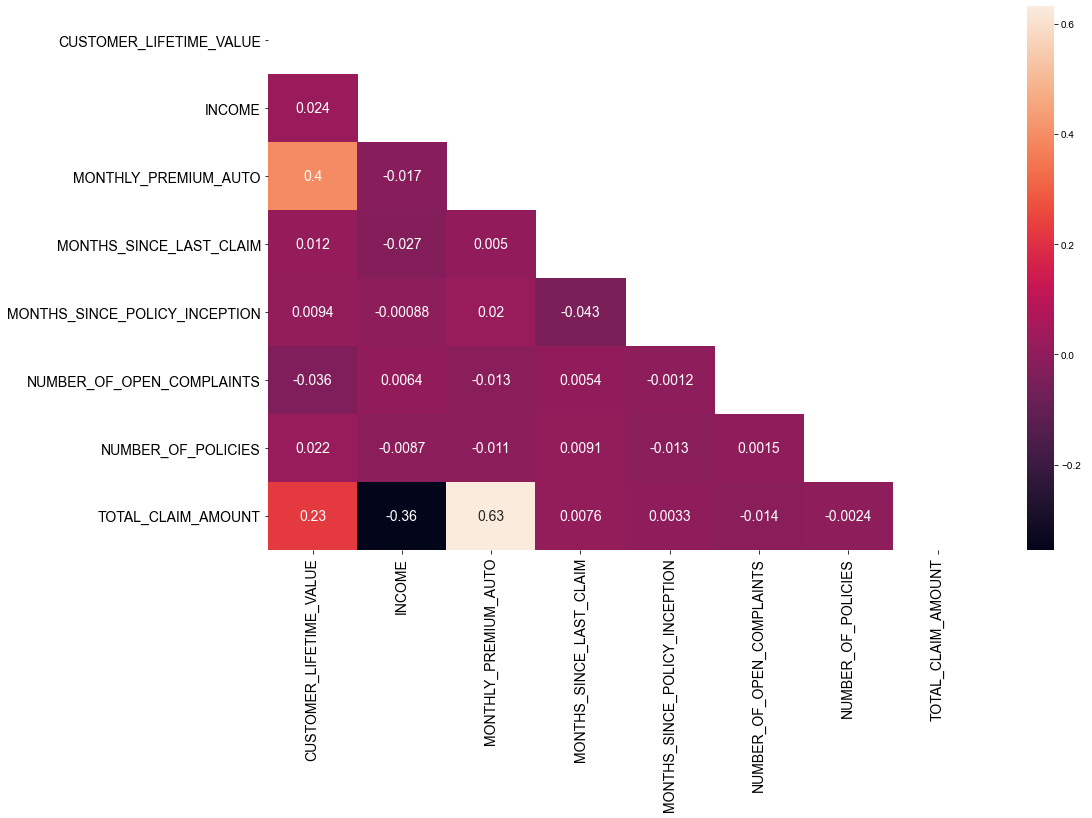

In [13]:
# plot heatmap
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask = mask, annot=True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#### Explore Visualising Data

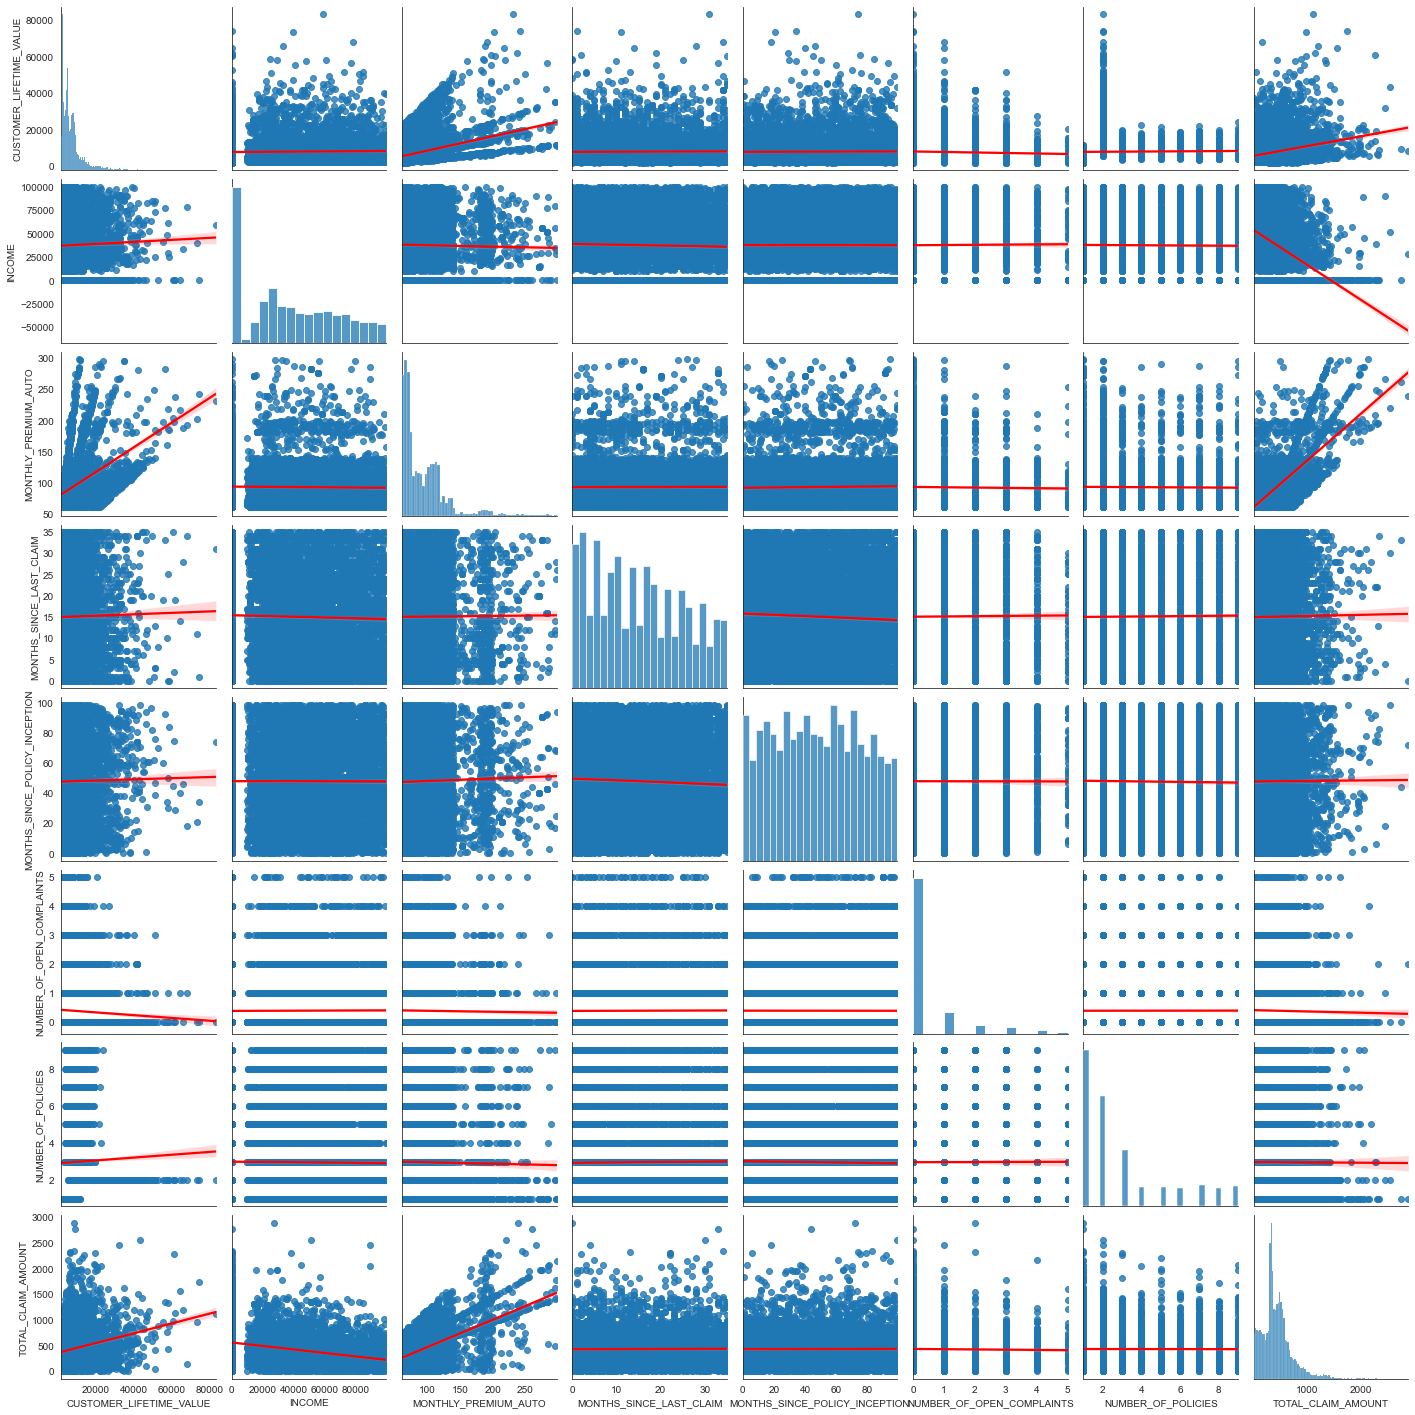

In [14]:
# redline= +ve correlated or -ve correlated
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [15]:
X_num.mean()

CUSTOMER_LIFETIME_VALUE           8004.940475
INCOME                           37657.380009
MONTHLY_PREMIUM_AUTO                93.219291
MONTHS_SINCE_LAST_CLAIM             15.097000
MONTHS_SINCE_POLICY_INCEPTION       48.064594
NUMBER_OF_OPEN_COMPLAINTS            0.384388
NUMBER_OF_POLICIES                   2.966170
TOTAL_CLAIM_AMOUNT                 434.088794
dtype: float64

### 05 - Modeling

#### Split Training & Test Data

In [16]:
target = X_num['TOTAL_CLAIM_AMOUNT']
features=X_num.drop('TOTAL_CLAIM_AMOUNT', axis=1)

# Tuple unpacking testsize 20%
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)


In [17]:
# % of training set
print('Training set in %:', 100*len(X_train)/ len(features))

Training set in %: 79.99781037880447


In [18]:
# % of test set
print('Test set in %:', 100*X_test.shape[0]/ features.shape[0])

Test set in %: 20.002189621195534


#### Regression

In [19]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.5179189781096698
Test data r-squared: 0.521188302273148
Intercept 70.28782136179234


,coef
CUSTOMER_LIFETIME_VALUE,-0.001075
INCOME,-0.003311
MONTHLY_PREMIUM_AUTO,5.392958
MONTHS_SINCE_LAST_CLAIM,-0.097589
MONTHS_SINCE_POLICY_INCEPTION,-0.096340
NUMBER_OF_OPEN_COMPLAINTS,-2.328286
NUMBER_OF_POLICIES,0.257959


In [20]:
X_num['TOTAL_CLAIM_AMOUNT'].skew()

1.7149658097209557

In [21]:
y_log= np.log(data['TOTAL_CLAIM_AMOUNT'])
y_log.tail()

9129    5.289452
9130    5.938064
9131    6.673026
9132    6.538429
9133    5.912421
Name: TOTAL_CLAIM_AMOUNT, dtype: float64

In [22]:
y_log.skew()

-1.9200328840780618

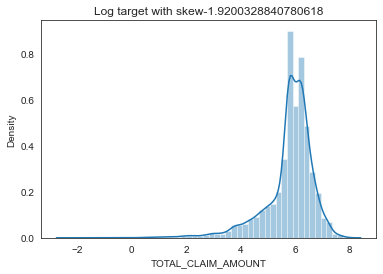

In [23]:
sns.distplot(y_log)
plt.title(f'Log target with skew{y_log.skew()}')
plt.show()

#### Regression using log 

In [24]:
target = np.log(data['TOTAL_CLAIM_AMOUNT']) # Use log prices
features = X_num.drop('TOTAL_CLAIM_AMOUNT', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.25623901454668696
Test data r-squared: 0.23545552905952105
Intercept 5.301971177432472


,coef
CUSTOMER_LIFETIME_VALUE,-0.000001
INCOME,-0.000010
MONTHLY_PREMIUM_AUTO,0.009972
MONTHS_SINCE_LAST_CLAIM,-0.001708
MONTHS_SINCE_POLICY_INCEPTION,-0.000453
NUMBER_OF_OPEN_COMPLAINTS,-0.007972
NUMBER_OF_POLICIES,-0.001296


In [25]:
#p value > 0.05 no good
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
pd.DataFrame({'coef':results.params, 'p-value':round(results.pvalues,3)})

,coef,p-value
const,5.301971,0.000
CUSTOMER_LIFETIME_VALUE,-0.000001,0.442
INCOME,-0.000010,0.000
MONTHLY_PREMIUM_AUTO,0.009972,0.000
MONTHS_SINCE_LAST_CLAIM,-0.001708,0.061
MONTHS_SINCE_POLICY_INCEPTION,-0.000453,0.168
NUMBER_OF_OPEN_COMPLAINTS,-0.007972,0.426
NUMBER_OF_POLICIES,-0.001296,0.736


In [26]:
#VIF > 10 no good
vif = [variance_inflation_factor(exog= X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])]
pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': np.round(vif,2)})

,coef_name,vif
0,const,17.18
1,CUSTOMER_LIFETIME_VALUE,1.20
2,INCOME,1.00
3,MONTHLY_PREMIUM_AUTO,1.19
4,MONTHS_SINCE_LAST_CLAIM,1.00
5,MONTHS_SINCE_POLICY_INCEPTION,1.00
6,NUMBER_OF_OPEN_COMPLAINTS,1.00
7,NUMBER_OF_POLICIES,1.00


#### Linear regression

In [27]:
Y = data['TOTAL_CLAIM_AMOUNT']
data = data.drop(['TOTAL_CLAIM_AMOUNT'], axis=1)

In [28]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

In [29]:
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

(9134, 7)


In [30]:
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)

(9134, 7)


In [31]:
X_cat = data.select_dtypes(include = np.object)

In [32]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_cat)
# encoder.categories_
encoded = encoder.transform(X_cat).toarray()
pd.DataFrame(encoded)

,0,1,2,3,4,5,6,7,8,9,...,9166,9167,9168,9169,9170,9171,9172,9173,9174,9175
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
pd.get_dummies(X_cat)

,CUSTOMER_AA10041,CUSTOMER_AA11235,CUSTOMER_AA16582,CUSTOMER_AA30683,CUSTOMER_AA34092,CUSTOMER_AA35519,CUSTOMER_AA56476,CUSTOMER_AA69265,CUSTOMER_AA71604,CUSTOMER_AA93585,...,SALES_CHANNEL_Web,VEHICLE_CLASS_Four-Door Car,VEHICLE_CLASS_Luxury Car,VEHICLE_CLASS_Luxury SUV,VEHICLE_CLASS_SUV,VEHICLE_CLASS_Sports Car,VEHICLE_CLASS_Two-Door Car,VEHICLE_SIZE_Large,VEHICLE_SIZE_Medsize,VEHICLE_SIZE_Small
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
9130,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9131,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9132,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [34]:
X = np.concatenate((x_normalized, encoded), axis=1)
print(X)

[[0.04904913 0.99879545 0.00122467 ... 1.         1.         0.        ]
 [0.99988883 0.         0.01346645 ... 0.         1.         0.        ]
 [0.2554939  0.96680794 0.0021411  ... 1.         1.         0.        ]
 ...
 [0.99993483 0.         0.01041102 ... 0.         1.         0.        ]
 [0.32439117 0.94591282 0.00413872 ... 0.         0.         0.        ]
 [0.99897259 0.         0.02945088 ... 1.         1.         0.        ]]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

In [37]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.7579774610502555

### 06 - Model Validation

In [38]:
mse = mean_squared_error(y_test, predictions)
print(mse)

19229.39399674618


In [39]:
r2 = r2_score(y_test, predictions)
r2

0.7579774610502555

In [40]:
n = len(X_test) 
p = X_test.shape[1]

In [41]:
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

1.1598749249156268

### 07 - Reporting